In [1]:
import math
from pprint import pprint
from collections import Counter

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

## ES5
### Write a program in a programming language of your choice that computes all the universal codes of integers we have studied (both encoding and decoding).

### Plot for each n = 1, ... 1000 the lengths of the binary, gamma, delta, Fibonacci codes. Also consider the Rice encoding for k=5 and k=7

### Report the statistics on the following experiments:
- Number of bits required to encode 100 integers between 1 and 100,000 (Consider integers 1, 1011, 2021, ...)
- Number of bits required to compress 100 random integers between 1 and 1000.
- Number of bits required to encode a sequence of 1000 integers with a distribution chosen in advance

### Gamma encoding/decoding
Given an integer x≥1, the code 𝛾 𝑥 is a binary sequence composed of
two parts:
- a sequence of 𝐵 𝑥 − 1 zeroes
- the binary representation 𝐵(𝑥) of 𝑥.

In [2]:
def gamma_decoding(binary_str: str) -> int:
    # Count the number N of leading zeros
    N = 0
    for c in binary_str:
        if c == "0":
            N += 1
        else:
            break

    # The number is represented by the N+1 bits starting after the zeros
    return int(binary_str[N:], 2)


def gamma_encoding(x: int) -> str:
    if x < 1:
        raise ValueError("Error, x must be >= 1")

    # N is the number of '0's, which is floor(log2(x))
    # N = |B(x)| - 1
    N = math.floor(math.log2(x))

    # Binary representation of x without the '0b' prefix
    binary_x = bin(x)[2:]

    # Gamma code consists of N '0's followed by the binary representation of x
    return "0" * N + binary_x


x = 8
enc = gamma_encoding(x)
print("Gamma encode: " + enc)

dec = gamma_decoding(enc)
print("Gamma decode: " + str(dec))

Gamma encode: 0001000
Gamma decode: 8


### Delta encoding/decoding
Given an integer x≥1, the code 𝛿 𝑥 is a binary sequence composed of
two parts:
- 𝛾( 𝐵 𝑥 )
- the binary representation 𝐵(𝑥) of 𝑥, the most significant bit excluded.

In [4]:
def delta_encoding(x: int) -> str:
    # Calculate N as in Gamma Encoding
    N = math.floor(math.log2(x))

    # First part of the output is the Gamma Encoding of 'N + 1'
    output = gamma_encoding(N + 1)

    # Append the binary representation of x without its MSB
    output += bin(x)[3:]

    return output


def delta_decoding(binary_str: str) -> int:
    # Count the leading '0' bits before the first '1'
    N = 0
    for b in binary_str:
        if b == "0":
            N += 1
        else:
            break

    # Extract the binary string starting from the first '1' after the leading zeros
    new_bin = binary_str[N:]

    # Extract the remaining bits after the initial 'N + 1' bits
    final_bin = new_bin[N + 1 :]

    # Return the integer value by concatenating '1' and the remaining bits
    return int("1" + final_bin, base=2)


x = 14
enc = delta_encoding(x)
print("Delta encode: " + enc)

dec = delta_decoding(enc)
print("Delta decode: " + str(dec))

Delta encode: 00100110
Delta decode: 14


### Fibonacci encode/decode
Given a number N>0, the correspondent Fibonacci codeword is defined
as
𝑑0𝑑1𝑑2… 𝑑𝑘−1 𝑑𝑘

if N=σ𝑖=0 𝑘−1 𝑑𝑖𝐹 𝑖+2 e 𝑑𝑘−1= 𝑑𝑘 = 1.

In [7]:
def __get_fib_sequence(x: int) -> list:
    # Initialize Fibonacci list with the first two numbers
    fib_list = [0, 1]
    i = 1

    # Create the Fibonacci list until the last Fibonacci number is less than or equal to x
    while fib_list[i] + fib_list[i - 1] <= x:
        fib_list.append(fib_list[i] + fib_list[i - 1])
        i += 1

    return fib_list[2:]


def __gen_fibonacci_until_n(n: int) -> list:
    # Generate the first n Fibonacci numbers
    a, b = 0, 1
    fib_list = [a]

    for _ in range(n):
        a, b = b, a + b
        fib_list.append(a)

    return fib_list


def fibonacci_encoding(x: int) -> str:
    # Generate the Fibonacci sequence up to the upper bound x
    fib_sequence = __get_fib_sequence(x)
    encoding = ["0"] * len(fib_sequence)

    # Encode x using Zeckendorf representation
    while x > 0:
        # Filter the Fibonacci sequence to get the relevant numbers <= x
        # print("before:", fib_sequence)
        fib_sequence = [item for item in fib_sequence if item <= x]
        # print("after:", fib_sequence)

        # Find the largest Fibonacci number <= x
        largest_fib = max(fib_sequence)
        # print(largest_fib)
        x -= largest_fib
        # print(x)

        # Find the index of the largest Fibonacci number
        i = fib_sequence.index(largest_fib)

        # Set the corresponding bit in the encoding to '1'
        encoding[i] = "1"
        # print(encoding)

    # Append the terminating '1' to the encoding
    encoding.append("1")

    return "".join(encoding)


def fibonacci_decoding(bin_str: str) -> int:
    # Remove the last '1' from the binary string (LSB)
    bin_str = bin_str[:-1]
    output = 0

    # Start from the third Fibonacci number (corresponding to the Zeckendorf representation)
    pos = 2

    # Generate the Fibonacci sequence with length equal to the binary string
    fibonacci_sequence = __gen_fibonacci_until_n(len(bin_str) + 1)

    # Decode the binary string using the Fibonacci sequence
    for bit in bin_str:
        if bit == "1":
            output += fibonacci_sequence[pos]
        pos += 1

    return output


x = 7
enc = fibonacci_encoding(x)
print("Fibonacci encode: " + enc)

dec = fibonacci_decoding(enc)
print("Fibonacci decode: " + str(dec))

Fibonacci encode: 01011
Fibonacci decode: 7


### Rice code encoding/decoding

In [13]:
def rice_code_encoding(x: int, k: int) -> str:
    # Compute the quotient as the floor of (x - 1) divided by 2^k
    q = math.floor((x - 1) / pow(2, k))
    # print(q)

    # Compute the remainder as the difference between x and (2^k * q + 1)
    r = x - pow(2, k) * q - 1
    # print(r)

    # Write the first part of the codeword as a unary string of 'q'
    unary_prefix = "0" * q + "1"

    # Concatenate the binary representation of 'r', padded with leading zeros to make it 'k' bits long
    suffix = bin(r)[2:].zfill(k)

    return unary_prefix + suffix


def rice_code_decoding(bin_str: str, k: int) -> int:
    q = 0

    # Calculate the quotient by counting the number of '0' bits before the first '1'
    for b in bin_str:
        if b == "1":
            break
        q += 1

    # Calculate the remainder by converting the binary string after the unary quotient to an integer
    r = int(bin_str[q + 1 :], base=2)

    # Use the remainder and quotient to compute the original number 'x'
    return r + pow(2, k) * q + 1


x = 83
k = 4

enc = rice_code_encoding(x, k)
print("Rice encode: " + enc)

dec = rice_code_decoding(enc, k)
print("Rice decode: " + str(dec))

Rice encode: 0000010010
Rice decode: 83


### Analysis

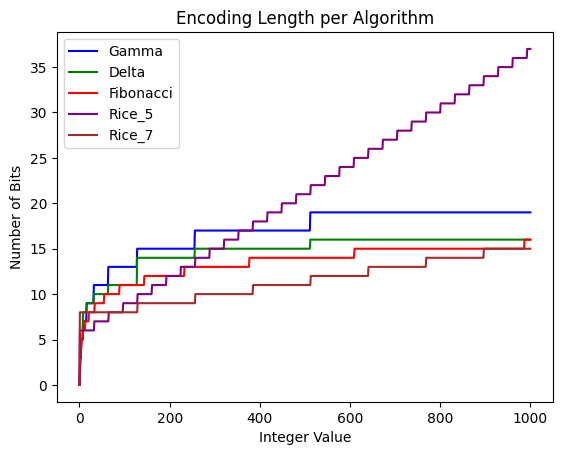

Number of bits required to encode 100 integers between 1 and 100,000
Gamma 	 Mean: 30.14	Number of Bits: 3014
Delta 	 Mean: 22.85	Number of Bits: 2285
Fib 	 Mean: 22.90	Number of Bits: 2290
Rice_5 	 Mean: 1567.88	Number of Bits: 156788
Rice_7 	 Mean: 398.10	Number of Bits: 39810
Binary 	 Mean: 15.57	Number of Bits: 1557

Number of bits required to compress 100 random integers between 1 and 1000
Gamma 	 Mean: 46.70	Number of Bits: 4670
Delta 	 Mean: 37.29	Number of Bits: 3729
Fib 	 Mean: 36.03	Number of Bits: 3603
Rice_5 	 Mean: 1588.07	Number of Bits: 158807
Rice_7 	 Mean: 409.27	Number of Bits: 40927
Binary 	 Mean: 24.35	Number of Bits: 2435

Number of bits required to encode a sequence of 1000 integers with a normal distribution
Gamma 	 Mean: 6.03	Number of Bits: 6034
Delta 	 Mean: 5.28	Number of Bits: 5275
Fib 	 Mean: 5.80	Number of Bits: 5803
Rice_5 	 Mean: 164.81	Number of Bits: 164807
Rice_7 	 Mean: 48.93	Number of Bits: 48927
Binary 	 Mean: 3.62	Number of Bits: 3617


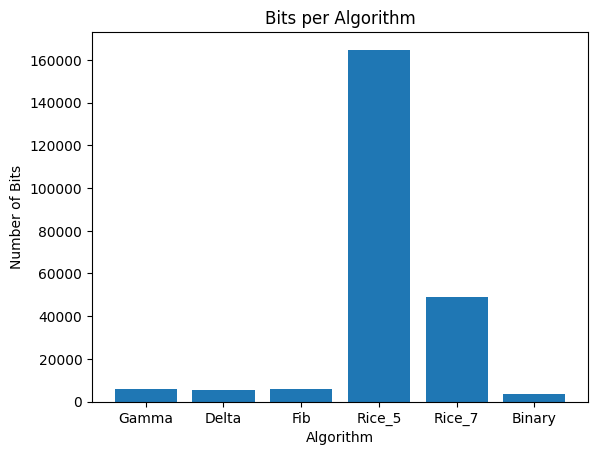

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


def plot_len_stats(upper_bound: int):
    x_axis = np.arange(upper_bound)
    gamma_axis = np.zeros(upper_bound)
    delta_axis = np.zeros(upper_bound)
    fibonacci_axis = np.zeros(upper_bound)
    rice_5_axis = np.zeros(upper_bound)
    rice_7_axis = np.zeros(upper_bound)

    for n in range(1, upper_bound):
        gamma_axis[n] = len(gamma_encoding(n))
        delta_axis[n] = len(delta_encoding(n))
        fibonacci_axis[n] = len(fibonacci_encoding(n))
        rice_5_axis[n] = len(rice_code_encoding(n, 5))
        rice_7_axis[n] = len(rice_code_encoding(n, 7))

    plt.plot(x_axis, gamma_axis, c="blue", label="Gamma")
    plt.plot(x_axis, delta_axis, c="green", label="Delta")
    plt.plot(x_axis, fibonacci_axis, c="red", label="Fibonacci")
    plt.plot(x_axis, rice_5_axis, c="purple", label="Rice_5")
    plt.plot(x_axis, rice_7_axis, c="brown", label="Rice_7")
    plt.legend()
    plt.ylabel("Number of Bits")
    plt.xlabel("Integer Value")
    plt.title("Encoding Length per Algorithm")
    plt.show()


def compute_and_print_statistics(n: int, upper_bound: int):
    algorithms = ["Gamma", "Delta", "Fib", "Rice_5", "Rice_7", "Binary"]
    length = [0] * len(algorithms)
    mean = [0] * len(algorithms)

    # For integers in range [1-100000]
    print(f"{bcolors.OKGREEN}Number of bits required to encode 100 integers between 1 and 100,000{bcolors.ENDC}")
    for x in range(1, upper_bound, 1010):
        length[0] += len(gamma_encoding(x))
        length[1] += len(delta_encoding(x))
        length[2] += len(fibonacci_encoding(x))
        length[3] += len(rice_code_encoding(x, 5))
        length[4] += len(rice_code_encoding(x, 7))
        length[5] += len(bin(x)[2:])

    for i in range(len(mean)):
        mean[i] = length[i] / n

    for i in range(len(mean)):
        print(f"{algorithms[i]} \t Mean: {mean[i]:.2f}\tNumber of Bits: {length[i]}")

    # For random integers [1-1000]
    upper_bound = 100
    print(f"\n{bcolors.OKGREEN}Number of bits required to compress 100 random integers between 1 and 1000{bcolors.ENDC}")
    for _ in range(upper_bound):
        x = random.randint(1, 1000)
        length[0] += len(gamma_encoding(x))
        length[1] += len(delta_encoding(x))
        length[2] += len(fibonacci_encoding(x))
        length[3] += len(rice_code_encoding(x, 5))
        length[4] += len(rice_code_encoding(x, 7))
        length[5] += len(bin(x)[2:])

    for i in range(len(mean)):
        mean[i] = length[i] / upper_bound

    for i in range(len(mean)):
        print(f"{algorithms[i]} \t Mean: {mean[i]:.2f}\tNumber of Bits: {length[i]}")

    # For normal distribution
    upper_bound = 1000
    print(f"\n{bcolors.OKGREEN}Number of bits required to encode a sequence of 1000 integers with a normal distribution{bcolors.ENDC}")
    numbers = [math.ceil(np.random.normal()) for _ in range(upper_bound)]

    for n in numbers:
        if n < 0:
            n = -n
        elif n == 0:
            n = 1
        length[0] += len(gamma_encoding(n))
        length[1] += len(delta_encoding(n))
        length[2] += len(fibonacci_encoding(n))
        length[3] += len(rice_code_encoding(n, 5))
        length[4] += len(rice_code_encoding(n, 7))
        length[5] += len(bin(n)[2:])

    for i in range(len(mean)):
        mean[i] = length[i] / upper_bound

    for i in range(len(mean)):
        print(f"{algorithms[i]} \t Mean: {mean[i]:.2f}\tNumber of Bits: {length[i]}")

    # Bar plot for average bit lengths
    n_bars = np.arange(len(algorithms))
    plt.bar(n_bars, length, align="center")
    plt.xticks(n_bars, algorithms)
    plt.ylabel("Number of Bits")
    plt.xlabel("Algorithm")
    plt.title("Bits per Algorithm")
    plt.show()

plot_len_stats(1001)
compute_and_print_statistics(100, 100000)

### Esperimento 1: lunghezza di codifica per ogni valore n
Il primo grafico mostra chiaramente che Gamma, Delta e Fibonacci sono più efficienti per numeri piccoli,  
mentre le codifiche di Rice possono essere più vantaggiose a seconda del valore scelto per k

### Esperimento 2: Compressione di 100 numeri casuali tra 1 e 1000
Binary risulta essere il migliore con media 24.35
Delta e Fibonacci mostrano buone performance 22.85 e 22.90 rispettivamente
Gamma richiede più bit rispetto a Delta e Fibonacci (30.14 in media).
Rice(5) e Rice(7) sono altamente inefficienti

### Esperimento 3: Encoding di 1000 numeri con una distribuzione normale
Binary continua a essere il più efficiente con media 3.62
Gamma, Delta e Fibonacci offrono una buona compressione (6.03, 5.27 e 5.8 bit in media)
Rice(5) e Rice(7) rimangono inefficaci (164807 e 48927 bit totali)